In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# The operator module has functional versions of all 
# operators like add, substract, less than, greater than, etc
from operator import add

In [3]:
from functools import partial
# does partial function application ("currying")
# def add1(x): return add(1, x)
# Could be written as 

add1 = partial(add, 1)
add1(5)

6

In [4]:
from functools import reduce
# folding a list of objects into a single object
from random import shuffle
items = list(range(50))
shuffle(items)
reduce(max, items)

49

In [5]:
# Iterator: Serves values one at a time using the "next()" method
# sequence of items are generated on demand (lazily)
# allows us to create lazy infinite sequences

# Generators can be used to get iterators
def lazy_integers(n=0):
    while True:
        yield n
        n += 1

In [6]:
xs = lazy_integers()
[next(xs) for _ in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
# generators maintain state
[next(xs) for _ in range(10)]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
# generator comprehensions
# computes nothing until next is called
squares = (x**2 for x in lazy_integers())
evens = (2*x for x in lazy_integers())

In [9]:
print(next(squares))
print(next(squares))
print(next(squares))
print(next(squares))

0
1
4
9


In [10]:
# generators and pipelines
# in unix
# $ cat euler.txt | grep -i "prime" | wc -l

# python equivalent
with open("data/euler.txt", 'r') as f:
    lines = (line for line in f)  # generator - lazy evaluation
    prime_lines = filter(lambda line: "prime" in line.lower(), lines)
    line_count = sum((1 for line in prime_lines))

print(line_count)

5


In [11]:
from itertools import count

# count([start=0], [step=1])

# Gives the infinite sequence:
# start, start + step, start + 2*step ....

xs = count(start=10, step=5)
[next(xs) for _ in range(10)]

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

In [12]:
from itertools import islice

# islice(seq, [start=0], stop, [step=1])

# Returns a "lazy slice" out of sequence

xs = islice(count(start=10, step=5), 0, 20, 2)
print([x for x in xs])

xs = islice(count(start=10, step=5), 1, 20, 2)
print([x for x in xs])

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[15, 25, 35, 45, 55, 65, 75, 85, 95, 105]


In [13]:
from itertools import tee

# tee(it, [n=2])

# splits an iterator into two or more memoized copies

# huge efficiency gains if you have to iterate through expensive computation
# multiple times

# The tee() function returns several independent iterators (defaults to 2) based on a single original input. 
# It has semantics similar to the Unix tee utility, which repeats the values it reads from its input and writes 
# them to a named file and standard output.

# Once tee() has made a split, the original iterable should not be used anywhere else; 
# otherwise, the iterable could get advanced without the tee objects being informed.

# This itertool may require significant auxiliary storage (depending on how much temporary data needs to be stored).
# In general, if one iterator uses most or all of the data before another iterator starts, it is faster to use 
# list() instead of tee().

r = islice(count(), 5)
i1, i2 = tee(r)

print('i1:')
for i in i1:
    print(i, end=", ")

print('\ni2:')
for i in i2:
    print(i, end=", ")

i1:
0, 1, 2, 3, 4, 
i2:
0, 1, 2, 3, 4, 

In [14]:
from itertools import repeat

# repeat(elem, [n=forever])

# repeats elem n times (or forvever if no n)

xs = repeat(5)
[next(xs) for _ in range(10)]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [15]:
from itertools import cycle

# cycle(p)

# repeats the elements of p over and over and over again forever

xs = cycle(islice(count(), 3))
[next(xs) for _ in  range(12)]

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]

In [16]:
from itertools import chain

# chain(p, q, ...)

# iterates first through the elements of p, then the elements of q and so on

xs = chain(islice(count(), 5), islice(count(start=100), 5))
list(xs)

[0, 1, 2, 3, 4, 100, 101, 102, 103, 104]

In [17]:
from itertools import accumulate

# accumulate(p, [func=add])

# returns the sequence a where

# a[0] = p[0]
# a[1] = func(a[0], p[1])
# a[2] = func(a[1], p[2])
# ....

i1, i2 = tee(count(), 2)
xs = accumulate(i2, add)
print([next(i1) for _ in range(10)])
print([next(xs) for _ in range(10)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]


In [18]:
list(islice(count(), 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
# More Itertool Recepies

def take(n, it):
    "Returns the first n elements if the iterator as a list"
    return list(islice(it, n))

def drop(n, it):
    "Returns a sequence with all but the first n elements of the given sequence"
    return islice(it, n, None)

tail = partial(drop, 1)

def nth(iterable, n, default=None):
    "Returns the nth item or a default value"
    return next(islice(iterable, n, None), default)

In [20]:
# needed an iterate(f, x) which generates the sequence x, f(x), f(f(x)), f(f(f(x))) ....
def iterate(f, x):
    return accumulate(repeat(x), lambda x1, x2: f(x1))

In [21]:
take(11, iterate(lambda x: 2*x, 1))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [22]:
def fibs():
    """Functional implementation"""
    yield 1
    yield 1
    fib1, fib2 = tee(fibs(), 2)
    yield from map(add, fib1, tail(fib2))

In [23]:
%time take(50, fibs())
''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.24 ms


''

In [24]:
print(take(20, fibs()))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


In [25]:
# Another functional implementation of fibonacci
def next_fib_pair(pair):
    x, y = pair
    return y, x + y

def fibs():
    return (y for x, y in iterate(next_fib_pair, (0, 1)))

In [26]:
%time take(50, fibs())
''

CPU times: user 34 µs, sys: 6 µs, total: 40 µs
Wall time: 43.6 µs


''

In [27]:
print(take(50, fibs()))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025]


In [28]:
# k-means clustering
# ------------------
# 1. have some points
# 2. want to group them into k clusters
# 3. want clusters to be small
# -------------------------------------
# Iterative approach
# 1. choose k-means
# 2. assign each point to cluster of closest mean
# 3. compute new means
# 4. repeat

In [29]:
import numpy as np
from random import sample

In [41]:
def sample_np_array(np_array, sample_size):
    t = np.random.randint(len(np_array), size=sample_size)
    return np_array[t, :]

In [37]:
class KMeans:
    
    def __init__(self, k):
        self.k = k
        self.means = None
    
    def predict(self, point):
        """ Return index of closest mean """
        d_min = float('inf')
        for j, m in enumerate(self.means):
            d = sum((m_i - p_i)**2 for m_i, p_i in zip(m, point))
            if d < d_min:
                prediction = j
                d_min = d
        return prediction
    
    def fit(self, points, num_iters=10):
        """ 
        Find the k-means 
        points : 2D Numpy array
        """
        assignments = [None for _ in range(len(points))]
        self.means = [(p[0], p[1]) for p in sample_np_array(points, self.k)]  # is list of tuples
        for _ in range(num_iters):
            # assign each point to its closest mean
            for i, point in enumerate(points):
                assignments[i] = self.predict(point)
            # compute new means
            for j in range(self.k):
                cluster = [p for p, c in zip(points, assignments) if c == j]
                self.means[j] = list(map(lambda x: sum(x)/len(cluster), zip(*cluster)))
    

In [38]:
# 100 random points in the unit-square, 5 clusters
points = np.random.random_sample((100, 2))

In [39]:
model = KMeans(5)
model.fit(points)
assignments = [model.predict(point) for point in points]

In [44]:
# Now plot the means and the clusters
def plot_kmeans(points, means):
    for x, y in model.means:
        plt.plot(x, y, marker='*', markersize=10, color='black')

    for j, color in zip(range(5), ['r', 'g', 'b', 'm', 'c']):
        cluster = [p for p, c in zip(points, assignments) if c == j]
        xs, ys = zip(*cluster)
        plt.scatter(xs, ys, color=color)

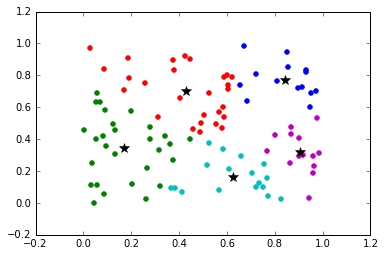

In [45]:
plot_kmeans(points, model.means)

In [ ]:
# Functional way of implementing K-Means

In [54]:
def squared_distance(p1, p2):
    return sum((c_i - d_i)**2 for c_i, d_i in zip(p1, p2))


def closest_index(means, point):
    """ Return index of closest mean """
    distances = map(partial(squared_distance, point), means)
    return min(enumerate(distances), key=lambda pair: pair[1])[0]    


def new_means(points, prev_means):
    """
    Find the new means
    points : 2D Numpy array
    prev_means : list of tuples
    """    
    k = len(prev_means)
    means = [None for _ in range(k)]
    # assign each point to its closest mean
    assignments = [predict(prev_means, p) for p in points]
    # compute new means
    for j in range(k):
        cluster = [p for p, c in zip(points, assignments) if c == j]
        means[j] = list(map(lambda x: sum(x)/len(cluster), zip(*cluster)))
    return means


def k_meanses(points, k):
    initial_means = [(p[0], p[1]) for p in sample_np_array(points, k)]  # is list of tuples
    return iterate(partial(new_means, points), initial_means)    
    

In [55]:
means = nth(k_meanses(points, 5), 10)

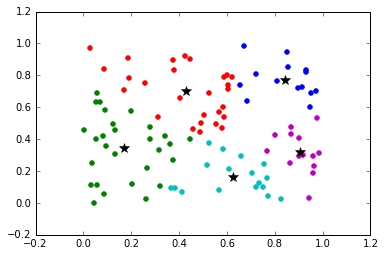

In [56]:
plot_kmeans(points, means)

In [53]:
def within_tolerance(tol, prev, curr):
    if abs(prev - curr) < tol:
        raise StopIteration
    else:
        return curr

def until_convergence(it, tolerance=0.001):
    accumulate(it, partial(within_tolerance, tolerance))

In [77]:
import math
import random

In [68]:
# Gradient Descent

In [69]:
def f(x_i):
    return sum(x_ij**2 for x_ij in x_i)

# Gradient of x^2 is 2*x
def df(x_i):
    return [2*x_ij for x_ij in x_i]

In [70]:
def gradient_step(df, alpha, x_i):
    return [x_ij + alpha * df_j for x_ij, df_j in zip(x_i, df(x_i))]

# If we curry df and alpha then
# point -> next_point

def gradient_descent(df, x_0, alpha=0.1):
    return iterate(partial(gradient_step, df, -alpha), x_0)

In [74]:
# The function f is the sum of squares so we know that the minima is at 0
take(100, gradient_descent(df, [random.random(), random.random()]))[::10]

[[0.9886305664600928, 0.13623305542078767],
 [0.10615339876930133, 0.014627912941660964],
 [0.011398134401834894, 0.0015706601923292252],
 [0.001223865362282335, 0.00016864835397957726],
 [0.00013141154264274552, 1.8108479121662893e-05],
 [1.4110206949187539e-05, 1.944383140196023e-06],
 [1.5150719346638104e-06, 2.0877654995089255e-07],
 [1.6267961026171286e-07, 2.241721135526985e-08],
 [1.746759014500207e-08, 2.4070297409600963e-09],
 [1.875568210317895e-09, 2.584528504480742e-10]]

In [75]:
# Trying out a little more complex function

def random_point():
    return [3*random.random() - 1, 3*random.random() - 1]

def f(x):
    """
    f(x, y) = -exp(-x^3 / 3 + x - y^2)
    Has minima at (1, 0)
    Saddle point at (-1, 0)
    """
    return -math.exp(x[0]**3 / -3 + x[0] - x[1]**2)

In [79]:
def df(x):
    """ Just the gradient """
    return ((1 - x[0]**2) * f(x), -2 * x[1] * f(x))

In [80]:
# The function f is the sum of squares so we know that the minima is at 0
take(100, gradient_descent(df, random_point()))[::10]

[[1.7346754225451586, -0.19698188535084715],
 [1.0061524714002719, -0.0025906193524131973],
 [1.0000439969904003, -1.8618598010857285e-05],
 [1.0000003161776165, -1.3380448302474943e-07],
 [1.0000000022722426, -9.61599773813217e-10],
 [1.0000000000163298, -6.9106363560814674e-12],
 [1.0000000000001175, -4.966400382626478e-14],
 [1.0000000000000009, -3.5691550661389834e-16],
 [1.0000000000000002, -2.565010249819736e-18],
 [1.0000000000000002, -1.8433711788256905e-20]]